# QAC Report Format

by Chris North, Virginia Tech


## QAC format for data science reports in a computational notebook

1. Question:
    * Question, problem, hypothesis, claim, context, motivation
    * Definitions, data, methods to be used
    * Rationale, assumptions, biases
    * Qualitative in nature, with definitions that prepare for quantitative Analysis section
    
    
2. Analysis:
    * Data processing, analysis, visualization
    * Documented code and results
    * Summary visuals
    * Quantitative in nature


3. Conclusion:
    * Answer the Question, summary, interpretation, re-contextualization, story, relate to domain knowledge
    * Uncertainty, limitations, caveats, biases
    * New problems, updates to the Question, follow-up questions, next steps
    * Qualitative in nature, shifting quantitative result back into qualitative question & answer


4. Repeat. QAC-QAC-QAC-... 
    * Break down a large problem into parts
    * Alternative approaches to a problem
    * Sequence of related problems, "vignettes"
    * Follow-up problems


### References:
* Good example of a Jupyter Notebook report: https://nbviewer.jupyter.org/gist/nealcaren/5105037
* QQQ variant of QAC: https://www.bava.stat.vt.edu/wp-content/uploads/2017/08/Developing-a-New-Interdisciplinary-Computational-Analytics-Undergraduate-Program-A-Qualitative-Quantitative-Qualitative-Approach.pdf
* Using visuals to support claims: https://www.cbre.com/research-and-reports/Scoring-Tech-Talent-in-North-America-2018


## Example

Which NCAA basketball conference is best?
* https://www.ncaa.com/march-madness-live/bracket
* https://www.ncaa.com/rankings/basketball-men/d1/ncaa-mens-basketball-net-rankings

Exercise: Construct a QAC format report.

In [1]:
###
import requests, bs4, pandas

url = 'https://www.ncaa.com/rankings/basketball-men/d1/ncaa-mens-basketball-net-rankings'

schools = pandas.DataFrame(
    [(int(r.contents[1].text), r.contents[5].text, r.contents[7].text) 
        for r in 
            bs4.BeautifulSoup(requests.get(url).text, 'html5lib')
                .find_all('tr')[1:]],
    columns=['Ranking','School','Conference'])

len(schools)

358

In [2]:
schools

,Ranking,School,Conference
0,1,Gonzaga,WCC
1,2,Houston,AAC
2,3,Kansas,Big 12
3,4,Arizona,Pac-12
4,5,Baylor,Big 12
...,...,...,...
353,354,Lamar University,WAC
354,355,Mississippi Val.,SWAC
355,356,Eastern Ill.,OVC
356,357,Delaware St.,MEAC


In [7]:
# we decided to use median instead of mean, as we found the data is skewed.
schools.groupby('Conference').median().sort_values('Ranking')

,Ranking
Conference,
Big 12,36.0
Big Ten,41.0
SEC,48.0
Big East,50.0
Mountain West,77.0
ACC,81.0
Pac-12,88.0
AAC,96.0
MVC,119.5


In [6]:
schools[schools.Conference == 'ACC']

,Ranking,School,Conference
9,10,Duke,ACC
16,17,North Carolina,ACC
21,22,Virginia Tech,ACC
41,42,Wake Forest,ACC
42,43,Notre Dame,ACC
46,47,Miami (FL),ACC
67,68,Virginia,ACC
80,81,Clemson,ACC
82,83,Syracuse,ACC
103,104,Florida St.,ACC


## Is Your Conference the Best?

### Question
NCAA has a set of conferences, and also a ranking of the teams, but it is unclear which conference is the best. Many people want to be able to boast about their own conference being the best, and this leads to a lot of debates, we want to address this issue once and for all!

NCAA has a team list with its ranking and conference info at: .... url

But what do we mean by "best"? Conference is an aggregation of teams. So aggregating the quality of teams can reflect the quality of the entire conference.

But how to definre the "best" at the team level? There could be many possible ways, like ... after some discussion, we think making use of the official ranking of the team is a reasonable way to get started. Because, the offical calculation has taken account into many factors...***how they actually calculated the ranking?***

Overview of our method: first scrape the data, aggregation...

### Analysis

Here, we scrape the data from NCAA website, and show the total number of teams to check if we got all the data.

In [10]:
import requests, bs4, pandas

url = 'https://www.ncaa.com/rankings/basketball-men/d1/ncaa-mens-basketball-net-rankings'

schools = pandas.DataFrame(
    [(int(r.contents[1].text), r.contents[5].text, r.contents[7].text) 
        for r in 
            bs4.BeautifulSoup(requests.get(url).text, 'html5lib')
                .find_all('tr')[1:]],
    columns=['Ranking','School','Conference'])

len(schools)

358

Here is a overview of the data we get (i.e., top 5 rows and bottom 5 rows).

We removed the default index column to make the table more readable.

In [13]:
schools.set_index("Ranking")

,School,Conference
Ranking,,
1,Gonzaga,WCC
2,Houston,AAC
3,Kansas,Big 12
4,Arizona,Pac-12
5,Baylor,Big 12
...,...,...
354,Lamar University,WAC
355,Mississippi Val.,SWAC
356,Eastern Ill.,OVC


We then aggreagte the conference using median, and also sort the list to make the best conferences on the top.

We decided to use median instead of mean, as we found the data is skewed.

In [15]:
conf = schools.groupby('Conference').median().sort_values('Ranking')
conf

,Ranking
Conference,
Big 12,36.0
Big Ten,41.0
SEC,48.0
Big East,50.0
Mountain West,77.0
ACC,81.0
Pac-12,88.0
AAC,96.0
MVC,119.5


<AxesSubplot:ylabel='Conference'>

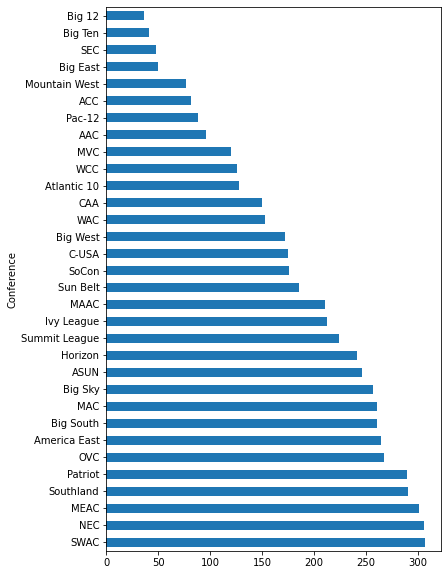

In [20]:
conf.sort_values('Ranking', ascending=False).plot.barh(figsize=(6,10), legend=False)

### Conclusion

Based on our analysis, Big 12 is the best conference. However, we also noticed that the top 4, includin Big 12, Big Ten, Sec, Big East are pretty close.

Caveats: We used ranking to do the analysis, there are other ways to be metrics. We also decided to use median instead of mean...
    
Future work: we can look at other metrics....

Open questions: how this ranking of conferences evlove across time?